In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import kruskal
import statsmodels.api as sm

In [2]:
file = pd.read_csv("bank_data.csv")

In [3]:
print(file)

        id  expected_recovery_amount  actual_recovery_amount  \
0     2030                       194              263.540000   
1     1150                       486              416.090000   
2      380                       527              429.350000   
3     1838                       536              296.990000   
4     1995                       541              346.385000   
...    ...                       ...                     ...   
1877   361                      9785            15388.195990   
1878   196                      9857             9709.909257   
1879   313                      9859            30209.181790   
1880  1781                      9920            20386.232190   
1881   522                      9964            16706.305920   

     recovery_strategy  age     sex  
0     Level 0 Recovery   19    Male  
1     Level 0 Recovery   25  Female  
2     Level 0 Recovery   27    Male  
3     Level 0 Recovery   25    Male  
4     Level 0 Recovery   34    Male  
...

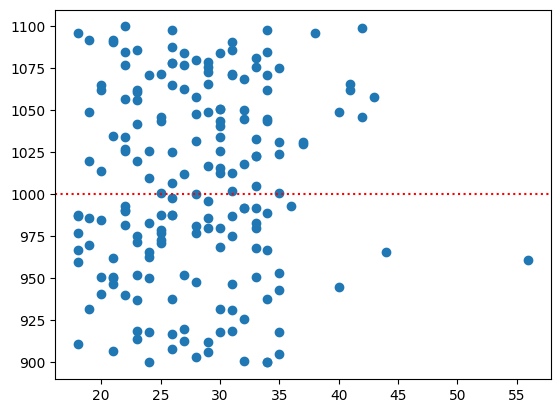

In [4]:
########## Statistical test: age vs. expected recovery amount ############

y = file.loc[(file['expected_recovery_amount'] >= 900) & (file['expected_recovery_amount'] <= 1100)]
x = y['age'].values
plt.scatter(x,y['expected_recovery_amount'].values)
plt.axhline(1000, color='red', ls='dotted')

In [18]:
recovery_thresholds = [1000, 2000, 3000, 4000]
threshold_ranges = [(threshold - 100, threshold + 100) for threshold in recovery_thresholds]

# Categorize recovery levels based on ranges
def categorize_recovery_level(amount):
    for i, (lower, upper) in enumerate(threshold_ranges):
        if lower <= amount <= upper:
            return i

file["recovery_level_index"] = file["expected_recovery_amount"].apply(categorize_recovery_level)

# Calculate average age for groups just above and just below the threshold
threshold_stats = []
for index in range(len(recovery_thresholds)):
    below_threshold = file[file["recovery_level_index"] == index]
    above_threshold = file[file["recovery_level_index"] == index + 1]
    
    avg_age_below = below_threshold["age"].mean()
    avg_age_above = above_threshold["age"].mean()
    
    threshold_stats.append({
        "Threshold": recovery_thresholds[index],
        "Avg Age Below": avg_age_below,
        "Avg Age Above": avg_age_above})

# Convert the threshold_stats list to a DataFrame
stats = pd.DataFrame(threshold_stats)

print(stats)

   Threshold  Avg Age Below  Avg Age Above
0       1000      27.978261      32.840426
1       2000      32.840426      43.661017
2       3000      43.661017      53.853659
3       4000      53.853659            NaN


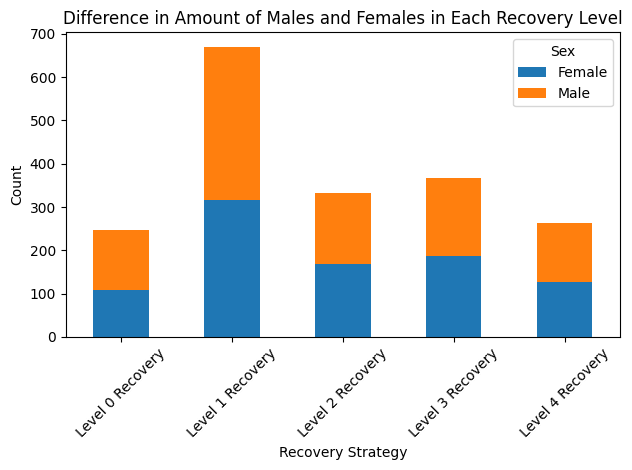

In [19]:
###### DIFF IN NUM OF MALES AND FEMALES IN EACH LEVEL #############
grouped = file.groupby(["recovery_strategy", "sex"]).size().unstack(fill_value=0)

# Plot the histogram
ax = grouped.plot(kind="bar", stacked=True)
plt.xlabel("Recovery Strategy")
plt.ylabel("Count")
plt.title("Difference in Amount of Males and Females in Each Recovery Level")
plt.legend(title="Sex")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

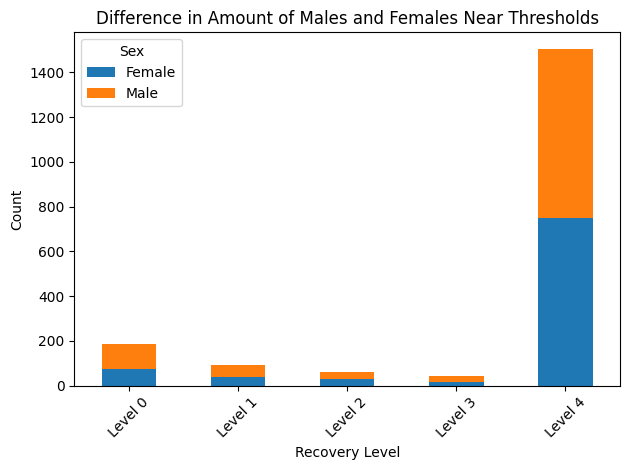

In [20]:
####### SHOWING THE DIFFERENCE IN AMOUNT OF MALES AND FEMALES NEAR THE THRESHOLD OF EACH LEVEL ##########
recovery_labels = [f"Level {i}" for i in range(len(recovery_thresholds) + 1)]
threshold_ranges = [(threshold - 100, threshold + 100) for threshold in recovery_thresholds]

# Categorize recovery levels based on ranges
def categorize_recovery_level(amount):
    for i, (lower, upper) in enumerate(threshold_ranges):
        if lower <= amount <= upper:
            return recovery_labels[i]
    return recovery_labels[-1]

file["recovery_level"] = file["expected_recovery_amount"].apply(categorize_recovery_level)

# Group data by recovery level and sex, and calculate counts
grouped = file.groupby(["recovery_level", "sex"]).size().unstack(fill_value=0)

# Plot the histogram
ax = grouped.plot(kind="bar", stacked=True)
plt.xlabel("Recovery Level")
plt.ylabel("Count")
plt.title("Difference in Amount of Males and Females Near Thresholds")
plt.legend(title="Sex")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kruksal wallis on narrow range 950 to 1050

In [21]:
############################################# STATISTICAL ANALYSIS : RECOVERY AMOUNT ###################################### 
#### KRUKSAL######


##data_group1 = file[(file["expected_recovery_amount"] >= 900) & (file["expected_recovery_amount"] <= 1100)]
##data_group2 = file[(file["expected_recovery_amount"] >= 950) & (file["expected_recovery_amount"] <= 1050)]


##result = stats.kruskal(data_group1, data_group2)
##print(result)
# Display test results
##print("Kruskal-Wallis Test Result for Window 1:")
##print("Statistic:", data_group1.statistic)
##print("P-value:", data_group1.pvalue)

##print("\nKruskal-Wallis Test Result for Window 2:")
##print("Statistic:", data_group2.statistic)
##print("P-value:", data_group2.pvalue)

from scipy.stats import kruskal

expected_recovery_amount = np.array(file["expected_recovery_amount"])
ages = np.array(file["age"])

ages_below_threshold = ages[(expected_recovery_amount >= 950) & (expected_recovery_amount < 1000)]
ages_above_threshold = ages[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1050)]

statistic, p_value = kruskal(ages_below_threshold, ages_above_threshold)

print("Kruskal-Wallis Statistic:", statistic)
print("p-value:", p_value)

a = 0.05
if(p_value <= a):
  print("major gap in average age between both groups")
else:
  print("no major gap in average age between both groups")



Kruskal-Wallis Statistic: 4.82336797906783
p-value: 0.02807643359111477
major gap in average age between both groups


Kruksal Wallis for wider range 900 to 1000 and 1000 to 1100

In [22]:


expected_recovery_amount = np.array(file["expected_recovery_amount"])
ages = np.array(file["age"])

ages_below_threshold = ages[(expected_recovery_amount >= 900) & (expected_recovery_amount < 1000)]
ages_above_threshold = ages[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1100)]

statistic, p_value = kruskal(ages_below_threshold, ages_above_threshold)

print("Kruskal-Wallis Statistic:", statistic)
print("p-value:", p_value)

a = 0.05
if(p_value <= a):
  print("major gap in average age between both groups")
else:
  print("no major gap in average age between both groups")

Kruskal-Wallis Statistic: 3.1596647465950647
p-value: 0.0754786822579167
no major gap in average age between both groups


In [43]:
expected_recovery_amount = np.array(file["expected_recovery_amount"])
actual_recovery_amount = np.array(file["actual_recovery_amount"])

### WIDE RANGE (900 to 1000) ###
actual_below_threshold_wide = actual_recovery_amount[(expected_recovery_amount >= 900) & (expected_recovery_amount < 1000)]
actual_above_threshold_wide = actual_recovery_amount[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1100)]


## NARROW RANGE (950 to 1050) ###
actual_below_threshold_narrow = actual_recovery_amount[(expected_recovery_amount >= 950) & (expected_recovery_amount < 1000)]
actual_above_threshold_narrow = actual_recovery_amount[(expected_recovery_amount > 1000) & (expected_recovery_amount <= 1050)]

statistic_wide, p_value_wide = kruskal(actual_below_threshold_wide, actual_above_threshold_wide)
statistic_narrow, p_value_narrow = kruskal(actual_below_threshold_narrow, actual_above_threshold_narrow)

print("Kruskal-Wallis Statistic for wide (900 - 1100) range:", statistic_wide)
print("p-value:", p_value_wide)
print("Kruskal-Wallis Statistic for narrow (950 - 1050) range:", statistic_narrow)
print("p-value:", p_value_narrow)

P_threshold = 0.05

if(p_value_wide <= P_threshold):
  print("major gap in the average of actual recovery amounts below and above the threshold")
else:
  print("no major gap in the average of actual recovery amounts below and above the threshold")

if(p_value_narrow <= P_threshold):
  print("major gap in the average of actual recovery amounts below and above the threshold")
else:
  print("no major gap in the average of actual recovery amounts below and above the threshold")

Kruskal-Wallis Statistic for wide (900 - 1100) range: 67.38392708550032
p-value: 2.2346330990871586e-16
Kruskal-Wallis Statistic for narrow (950 - 1050) range: 33.0431604938272
p-value: 9.013556650854467e-09
major gap in the average of actual recovery amounts below and above the threshold
major gap in the average of actual recovery amounts below and above the threshold


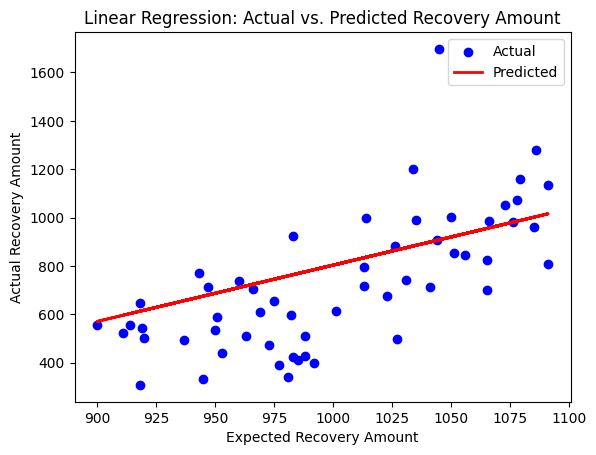

Model Coefficients:
Slope: 2.3310503717402593


In [24]:
##### Regression modeling: no threshold ######

def categorize_recovery_level(amount):
    for i, (lower, upper) in enumerate(threshold_ranges):
        if lower <= amount <= upper:
            return i

file["recovery_level_index"] = file["expected_recovery_amount"].apply(categorize_recovery_level)

above_threshold_data = file[file["recovery_level_index"] == 1]
below_threshold_data = file[file["recovery_level_index"] == 0]

X = below_threshold_data[["expected_recovery_amount"]]
y = below_threshold_data["actual_recovery_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Linear Regression: Actual vs. Predicted Recovery Amount')
plt.legend()
plt.show()

print("Model Coefficients:")
print("Slope:", model.coef_[0])


As predicted: there is a positive corelation between the expected and actual recovery amounts

OLS REGRESSION ON NO THRESHOLD DATA

In [34]:
threshold = 1000

file["above_threshold"] = (file["expected_recovery_amount"] > threshold).astype(int)

X_model1 = sm.add_constant(file[["expected_recovery_amount"]])
y_model1 = file["actual_recovery_amount"]
model1 = sm.OLS(y_model1, X_model1).fit()

print("Model 1 Summary:")
print(model1.summary())



Model 1 Summary:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                            20:52:21   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

OLS REGERSSION MODEL ON RANGE1 (900 to 1100) AND RANGE2 (950 to 1050)

In [41]:
### ADDING TRUE THRESHOLD ###
threshold = 1000
file["above_threshold"] = (file["expected_recovery_amount"] > threshold).astype(int)
range_1_data = file[(file["expected_recovery_amount"] >= 900) & (file["expected_recovery_amount"] <= 1100)]
range_2_data = file[(file["expected_recovery_amount"] >= 950) & (file["expected_recovery_amount"] <= 1050)]

# Model 1: OLS Linear Regression without threshold for Window 1
X_model1_range1 = sm.add_constant(range_1_data[["expected_recovery_amount"]])
y_model1_range1 = range_1_data["actual_recovery_amount"]

model1_range1 = sm.OLS(y_model1_range1, X_model1_range1).fit()

# Model 1: OLS Linear Regression without threshold for Window 2
X_model1_range2 = sm.add_constant(range_2_data[["expected_recovery_amount"]])
y_model1_range2 = range_2_data["actual_recovery_amount"]
model1_range2 = sm.OLS(y_model1_range2, X_model1_range2).fit()


print("Model Summary for Window 1:")
print(model1_range1.summary())


Model Summary for Window 1:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):           3.65e-13
Time:                            21:06:08   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [40]:
print("\nModel Summary for Window 2:")
print(model1_range2.summary())


Model Summary for Window 2:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.238
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     30.64
Date:                    Tue, 22 Aug 2023   Prob (F-statistic):           2.60e-07
Time:                            21:06:04   Log-Likelihood:                -702.76
No. Observations:                     100   AIC:                             1410.
Df Residuals:                          98   BIC:                             1415.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------